In [50]:
import pandas as pd 

df_color_1 = pd.read_csv('data/color_names.csv')
df_color_1['red'] = df_color_1['Red (8 bit)']
df_color_1['green'] = df_color_1['Green (8 bit)']
df_color_1['blue'] = df_color_1['Blue (8 bit)']
df_color_1['name'] = df_color_1['Name']
df_color_1 = df_color_1[['name','red', 'green', 'blue']]
df_color_1

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
1293,Yellow rose,255,240,0
1294,Yellow Sunshine,255,247,0
1295,Zaffre,0,20,168
1296,Zinnwaldite brown,44,22,8


In [51]:
import pandas as pd 

df_color_2 = pd.read_csv('data/colors.csv')
df_color_2
#filter colors in df_color_2 that are not in df_color_1
df_color_2 = df_color_2[~df_color_2['Name'].isin(df_color_1['name'])]
#transform percentage to 8 bit
#remove the % sign and convert to int

df_color_2['Red'] = df_color_2['Red'].str.replace('%', '').astype(float) /100 
df_color_2['red'] = (round(df_color_2['Red'] * 255)).astype(int)
df_color_2['Green'] = df_color_2['Green'].str.replace('%', '').astype(float) /100
df_color_2['green'] = (round(df_color_2['Green'] * 255)).astype(int)
df_color_2['Blue'] = df_color_2['Blue'].str.replace('%', '').astype(float) /100
df_color_2['blue'] = (round(df_color_2['Blue'] * 255)).astype(int)
df_color_2['name'] = df_color_2['Name']
df_color_2 = df_color_2[['name','red', 'green', 'blue']]
df_color_2

#concatenate the two dataframes
df_color = pd.concat([df_color_1, df_color_2])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
871,Xanthous,242,181,46
881,Yellow-green (Crayola),196,227,133
882,Yellow-green (Color Wheel),48,178,26
884,Yellow Orange (Color Wheel),255,148,5


In [52]:
import pandas as pd

df_color_3 = pd.read_csv('data/colors-1.csv', header=None)
#rename columns
df_color_3.columns = ['na_me','name','hex', 'red', 'green', 'blue']
#remove () from name
df_color_3['name'] = df_color_3['name'].str.replace('(', '')
df_color_3['name'] = df_color_3['name'].str.replace(')', '')
#check how many colors are not in df_color
df_color_3 = df_color_3[~df_color_3['name'].isin(df_color['name'])]
df_color_3 = df_color_3[['name','red', 'green', 'blue']]
df_color_3
#concatenate the three dataframes
df_color = pd.concat([df_color, df_color_3])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
858,Yellow Munsell,239,204,0
859,Yellow Ncs,255,211,0
861,Yellow Process,255,239,0
862,Yellow Ryb,254,254,51


In [53]:
def hex_to_int(s):
    s = s.lstrip("#")
    return int(s[:2], 16), int(s[2:4], 16), int(s[4:6], 16)

In [54]:
import json

color_data = json.loads(open("data/xkcd.json").read())
df_color_4 = pd.DataFrame(color_data['colors'])
# add column red with the value first from hex_to_int function using hex column
df_color_4['red'] = df_color_4['hex'].apply(lambda x: hex_to_int(x)[0])
df_color_4['green'] = df_color_4['hex'].apply(lambda x: hex_to_int(x)[1])
df_color_4['blue'] = df_color_4['hex'].apply(lambda x: hex_to_int(x)[2])
df_color_4['name'] = df_color_4['color']
df_color_4 = df_color_4[['name','red', 'green', 'blue']]
# order by name
df_color_4 = df_color_4.sort_values(by='name')
#capitalize first letter of name exampel "acid green" to "Acid Green"
df_color_4['name'] = df_color_4['name'].str.title()
# check how many colors are not in df_color
df_color_4 = df_color_4[~df_color_4['name'].isin(df_color['name'])]
#check how many colors are in df_color
#df_color_4 = df_color_4[df_color_4['name'].isin(df_color['name'])]
#print(df_color_4[df_color_4['name'] == 'Amber'], df_color_4[df_color_4['name'] == 'Amber'])
print(hex_to_int('#acc2d9'))
df_color_4
#concantenate df
df_color = pd.concat([df_color, df_color_4])
df_color


(172, 194, 217)


,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
813,Yellowish Green,176,221,22
361,Yellowish Orange,255,171,15
10,Yellowish Tan,252,252,129
258,Yellowy Brown,174,139,12


In [55]:
import json
df_color_5 = json.loads(open("data/color_names.json").read())
#first value is hex and second is name
df_color_5 = pd.DataFrame(df_color_5.items(), columns=['hex', 'name'])
df_color_5['red'] = df_color_5['hex'].apply(lambda x: hex_to_int(x)[0])
df_color_5['green'] = df_color_5['hex'].apply(lambda x: hex_to_int(x)[1])
df_color_5['blue'] = df_color_5['hex'].apply(lambda x: hex_to_int(x)[2])
df_color_5 = df_color_5[['name','red', 'green', 'blue']]
#check how many colors are not in df_color
df_color_5 = df_color_5[~df_color_5['name'].isin(df_color['name'])]
#concatenate the five dataframes
df_color = pd.concat([df_color, df_color_5])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
2325,Zircon,244,248,255
2326,Zombie,228,214,155
2328,Zorba,165,155,145
2329,Zuccini,4,64,34


In [56]:
import pandas as pd

df_color_6 = pd.read_csv('data/colors_pgp.csv')
# check for values in df_color_6 that are not in df_color
df_color_6 = df_color_6[~df_color_6['name'].isin(df_color['name'])]
df_color_6 = df_color_6[['name','red', 'green', 'blue']]
df_color_6
#concatenate the six dataframes
df_color = pd.concat([df_color, df_color_6])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
2062,Grape Juice,144,82,132
2063,Bermuda Onion,157,90,143
2064,Royal Lilac,131,89,149
2065,Reign Over Me,118,103,158


In [57]:
#drop nan values
df_color = df_color.dropna()
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
2062,Grape Juice,144,82,132
2063,Bermuda Onion,157,90,143
2064,Royal Lilac,131,89,149
2065,Reign Over Me,118,103,158


In [58]:
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
2062,Grape Juice,144,82,132
2063,Bermuda Onion,157,90,143
2064,Royal Lilac,131,89,149
2065,Reign Over Me,118,103,158


In [59]:
df = df_color

In [60]:
#remove ( and ) from name
df['name'] = df['name'].str.replace('(', '')
df['name'] = df['name'].str.replace(')', '')
# name as title
df['name'] = df['name'].str.title()
#remove / + from name
df['name'] = df['name'].str.replace('/', ' ')
df['name'] = df['name'].str.replace('+', ' ')
# remove - from name
df['name'] = df['name'].str.replace('-', ' ')
#sort by name
df = df.sort_values(by='name')
print(len(df))
# drop duplicates by name and keep mean of red, green and blue
df = df.groupby('name').agg({'red':'mean', 'green':'mean', 'blue':'mean'}).reset_index()
# round red, green and blue and convert to int
df['red'] = df['red'].round().astype(int)
df['green'] = df['green'].round().astype(int)
df['blue'] = df['blue'].round().astype(int)

print(len(df))
df

6124
5234


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_46608/628949926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.replace('(', '')
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_46608/628949926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.replace(')', '')
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_46608/628949926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,name,red,green,blue
0,Abbey,76,79,86
1,Abbey White,235,229,208
2,Absolute Zero,0,72,186
3,Abyss,223,230,234
4,Acadia,27,20,4
...,...,...,...,...
5229,Zombie,228,214,155
5230,Zomp,57,167,142
5231,Zorba,165,155,145
5232,Zuccini,4,64,34


In [61]:
#save df_color to csv
df.to_csv('data/color_names_all.csv', index=False)

In [26]:
import pandas as pd

df_a = pd.read_csv('data/color_names_all.csv')

             name  red  green  blue
540  Imperial red  237     41    57


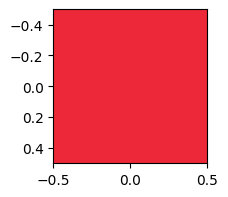

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def draw_color(rgb):
    data = [[rgb]]
    data = np.array(data)
    plt.figure(figsize=(2,2))
    data = data.reshape(1,1,3)
    plt.imshow(data, interpolation='nearest')
    plt.show()

random_color = df_a.sample()
print(random_color)
#get random color index as int
index = random_color.index[0]
draw_color(df_a.iloc[index][1:4].astype(int).values)


In [18]:
names = df_a['name']

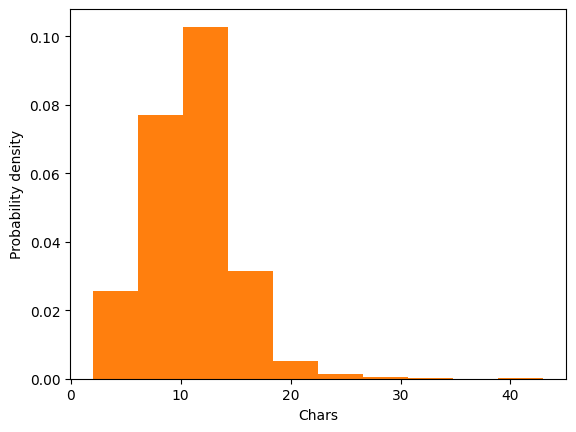

In [17]:
# get all the color names
names = df_a['name']
h = sorted(names.str.len().to_numpy())
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf_a(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,density=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [20]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6124 non-null   object
 1   red     6133 non-null   int64 
 2   green   6133 non-null   int64 
 3   blue    6133 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 191.8+ KB


In [29]:
#count how many colors have a name longer than 27 cha
names = df_a['name']

count = 0
for name in names:
    if len(name) > 30:
        count += 1
count

8

In [263]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1298 non-null   object
 1   red     1298 non-null   int64 
 2   green   1298 non-null   int64 
 3   blue    1298 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 40.7+ KB
